In [1]:
%run utils.ipynb

0
0


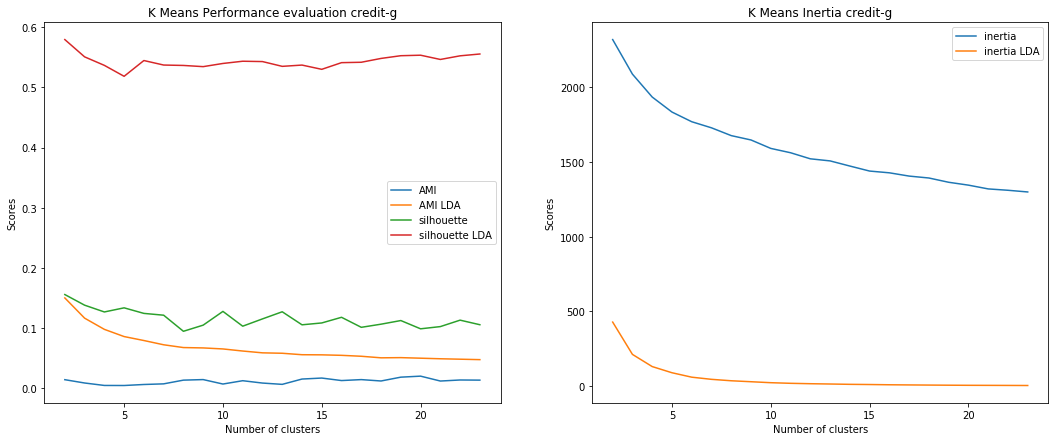

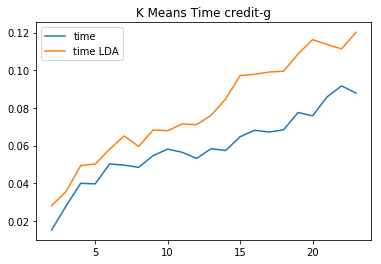

      AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0  0.0136  0.051325  0.014546     0.527      0.014684  0.522151     0.01441   

       inertia       init  mutual_info  n_clusters  precision  recall  \
0  2320.844198  k-means++     0.008802           2   0.517391   0.527   

   silhouette      time  v-measure  
0     0.15531  0.028154   0.014546  
------
        AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0  0.149665  0.188745  0.159783     0.477      0.150282  0.540291    0.169886   

     inertia       init  mutual_info  n_clusters  precision  recall  \
0  428.83629  k-means++     0.103777           2   0.622948   0.477   

   silhouette      time  v-measure  
0    0.579683  0.015248   0.159484  


ValueError: Shape of passed values is (1000, 1), indices imply (1000, 2)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

data = cdata
X = data['X_raw']
y = data['y_raw']
dataset_name = data['name']
n_components = data['n_features']
n_components_range = list(range(1,n_components+1))

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

np.random.seed(5)

# Create and Run LDA
lda = LDA()
X_lda = lda.fit(X, y)
# Array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
selected_n = select_n_components(lda_var_ratios, 0.95)

lda2 = LDA(n_components=selected_n)
reduced_data = lda2.fit_transform(X, y)
reduced_data_k_means_perf(data, reduced_data, method="LDA")




lda = LDA(n_components=2)
principal_components = lda.fit_transform(X, y)
v = lda.explained_variance_ratio_
principal_df = pd.DataFrame(data = principal_components, columns = ['pc1','pc2'])
final_df = pd.concat([principal_df, pd.DataFrame({'target': y})],axis=1)

fig, ax = plt.subplots()
final_df.plot.scatter(x='pc1', y='pc2', c='target', colormap='rainbow', s=10, ax=ax)
ax.set_xlabel("pc1 (%0.2f)"%v[0])
ax.set_ylabel("pc2 (%0.2f)"%v[1])
ax.set_title('2 Component LDA for %s dataset'%dataset_name)
plt.show()

# lda_scatter_two_component(data['name'], reduced_data, y)
    
# print(lda_var_ratios)
# _x_axis = list(range(1,len(lda_var_ratios)+1))
# lda_cum_var_ratios = np.cumsum(lda.explained_variance_ratio_)
# cr_85_x = np.argmax(lda_cum_var_ratios>0.84)
# cr_85_y = lda_cum_var_ratios[cr_85_x]

# # Create Pipeline
# decision_tree = DecisionTreeClassifier()
# pipe = Pipeline(steps=[('lda', lda),('decision_tree',decision_tree)])
# estimator =  GridSearchCV(pipe,dict(lda__n_components=_x_axis))
# estimator.fit(X, y)
# best_n_component = estimator.best_estimator_.named_steps['lda'].n_components


# fig, ax1 = plt.subplots()
# ax1.plot(_x_axis,lda_var_ratios, label="Individual")
# ax1.plot(_x_axis,lda_cum_var_ratios, label="Cumulative")
# ax1.set_ylabel("explained_variance_ratio_")

# ax1.plot(cr_85_x, cr_85_y, marker='o')
# ax1.annotate("(%i, %0.2f%%)"%(cr_85_x, cr_85_y),xy=(cr_85_x, cr_85_y))

# ax1.axvline(best_n_component,linestyle=':', label='n_components chosen', color="C3")

# # ax2 = ax1.twinx()
# # ax2.plot(lda.singular_values_, 'r-', label="Eigenvalues") #eigenvalues
# # ax2.set_ylabel('Eigenvalues', color='r')

# plt.xlabel('n_components')
# plt.title("LDA Explained Variance and Eigenvalues: "+ dataset_name)
# plt.legend()
# ax1.plot()
